# **Project: Handwritten Digit Recognition using Deep Learning** 


### Done By: Megala S


### Register Number: 21MDT0007


### Course:  M.sc Data Science          


## Problem Statement

### Human can visually sense the world around them by using their eyes and brains. Computer vision works on enabling computers to see and process images in the same way that human vision does. Several Algorithms developed in computer vision to recognize the images. The goal of this work is to create a model to identify and determine the Handwritten digit from its datasets with better Accuracy  and aim to complete this by using the concept of Convolutional Neural Network and MNIST dataset. Through this work, people can learn and practically apply the concepts of Convolutional Neural Network.


## Objective

### The main objectives of this project is to detect custom Hand Written digits and to get better results using CNN(Convolutional Neural Network) with Relu and Softmax function. The main scope of this project is improvise the Accuracy in recognizing and make image processing Learning Algorithm Techniques.

## Dataset Information

### In my project i taken MNIST(Modified National Institute of Standards and Technology ) dataset. This dataset contains 60,000 training images and 10,000 testing images. This is a large database of handwritten digits that is commonly used for training the image processing systems. 

## Import Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Load MNIST dataset

## Containing Training samples=60,000, Testing samples=10,000

### Tensorflow already contain MNIST data set which can be loaded using Keras

In [2]:
mnist = tf.keras.datasets.mnist # It is basically handwritten characters based on 28x28 sized images of 0 to 9 

### After loading the MNIST dataset, Divide into Train and Test datasets

In [3]:
## unpacking the dataset into train and test dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data() # Because it is a two dimensional dataset

In [4]:
x_train.shape

(60000, 28, 28)

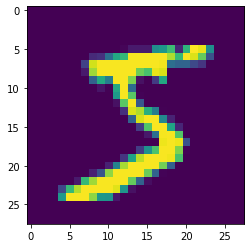

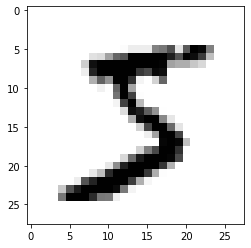

In [5]:
## just check the graph how data looks like
plt.imshow(x_train[0])
plt.show() # inorder to execute the graph
plt.imshow(x_train[0], cmap = plt.cm.binary)

## Checking the values of each pixel:-

### Before Normalization:

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### In this dataset, All images are Gray in color. (i.e: 1 channel => 0 to 255), And it is not colored (RGB)

## Normalizing the data | Pre-Processing Step

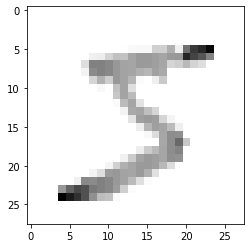

In [7]:
## In order to Normalize it
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

## After Normalization:

In [8]:
print(x_train[0]) # Now all the values are normalized.

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[0]) # To check whether the label is inside our network or not.

5


### Resizing the image to make it suitable for apply Convolutional Operation

In [10]:
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ## increasing one dimension for kernel operation
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)   ## increasing one dimension for kernel operation

print("Training Samples dimension", x_trainr.shape)
print("Testing Samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


## Creating a Deep Learning Network

### Training on 60,000 samples of MNIST Handwritten dataset

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

### Convolutional Layer

In [12]:
# Creating a Neural Network Model
model = Sequential()

# 1st Convolutional Layer (60000, 28, 28, 1) => 28-3+1 = 26x26
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) # Only for 1st convolution layer to mention input layer size
model.add(Activation("relu")) # Applying activation function to make it non-linear
model.add(MaxPooling2D(pool_size = (2,2))) # Maxpooling single maximum value of 2x2

# 2nd Convolutional Layer (26-3+1 = 24x24)
model.add(Conv2D(64, (3,3))) # 2nd convolution layer
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

# 3rd Convoltional Layer (24x24)
model.add(Conv2D(64, (3,3))) # 3rd convoltion layer
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

### Fully Connected Layer

In [13]:
# Fully Connected Layer #1 (20x20 = 400)
model.add(Flatten()) # Before using fully connected layer, need to be flatten so that
model.add(Dense(64))
model.add(Activation("relu"))

# Fully Connected Layer #2
model.add(Dense(32))
model.add(Activation("relu"))

# Last Fully Connected Layer, Here the output must be equal to the number of classes, 10 (0-9)
model.add(Dense(10)) # This last dense layer must be equal to 10
model.add(Activation("softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [15]:
print("Total Training Samples = ", len(x_trainr))

Total Training Samples =  60000


In [16]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [40]:
model_history=model.fit(x_train, y_train, epochs = 5, validation_split = 0.3) # Train My Model

Epoch 1/5
1313/1313 [==============================] - 157s 119ms/step - loss: 0.0375 - accuracy: 0.9884 - val_loss: 0.0599 - val_accuracy: 0.9828
Epoch 2/5
1313/1313 [==============================] - 151s 115ms/step - loss: 0.0329 - accuracy: 0.9897 - val_loss: 0.0614 - val_accuracy: 0.9827
Epoch 3/5
1313/1313 [==============================] - 147s 112ms/step - loss: 0.0266 - accuracy: 0.9911 - val_loss: 0.0643 - val_accuracy: 0.9824
Epoch 4/5
1313/1313 [==============================] - 145s 111ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0680 - val_accuracy: 0.9839
Epoch 5/5
1313/1313 [==============================] - 148s 113ms/step - loss: 0.0214 - accuracy: 0.9927 - val_loss: 0.0686 - val_accuracy: 0.9839


## Plotting the graph for Training vs Validation Accuracy

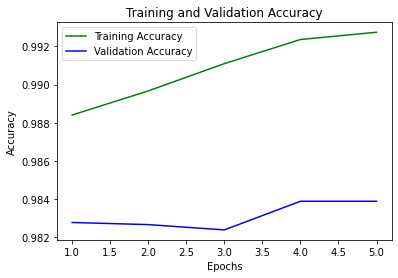

In [42]:
train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
epoachs = range(1,6)
plt.plot(epoachs,train_acc,'g',label='Training Accuracy')
plt.plot(epoachs,val_acc,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Evaluating on Testing dataset MNIST

In [19]:
# Evaluating on testing dataset MNIST
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test Loss on 10,000 test samples", test_loss)
print("Validation Accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 12s 35ms/step - loss: 0.0516 - accuracy: 0.9849
Test Loss on 10,000 test samples 0.05156371369957924
Validation Accuracy on 10,000 test samples 0.9848999977111816


## Accuracy on 10,000 Test Samples 98.4 

In [20]:
predictions = model.predict([x_testr])  

313/313 [==============================] - 12s 36ms/step


In [21]:
print(predictions)    

[[6.8355540e-08 4.0121193e-08 4.2050065e-06 ... 9.9998808e-01
  4.2558838e-08 4.8225120e-06]
 [3.1426371e-05 3.4771722e-07 9.9996698e-01 ... 4.4636911e-07
  4.5550930e-08 4.5009685e-08]
 [3.6994440e-08 9.9998760e-01 4.6114212e-07 ... 1.3572225e-07
  8.5657419e-08 6.5548728e-10]
 ...
 [1.4162909e-08 1.0534400e-06 2.9170414e-08 ... 7.5051939e-06
  4.4132335e-06 4.2388338e-06]
 [3.5184469e-06 1.7430901e-06 3.6105924e-08 ... 1.4586061e-07
  4.6368403e-04 2.6466535e-07]
 [1.0506029e-04 5.8319283e-06 2.2635119e-04 ... 1.0934281e-07
  7.9921956e-06 2.7949973e-06]]


### To check the Prediction

In [22]:
print(np.argmax(predictions[0]))

7


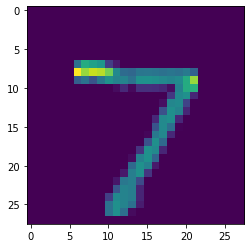

In [23]:
# Now, Check that our answer is true or not
plt.imshow(x_test[0])

In [24]:
print(np.argmax(predictions[257]))

8


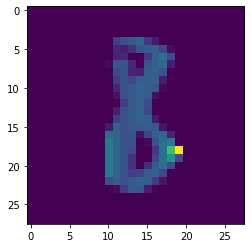

In [25]:
plt.imshow(x_test[257])

### To test with own handwritten digit image

In [26]:
import cv2  ## pip install opencv-python

In [27]:
img = cv2.imread('3.png')

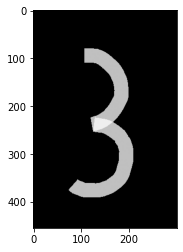

In [28]:
plt.imshow(img)

In [29]:
img.shape

(455, 300, 3)

In [30]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [31]:
gray.shape

(455, 300)

In [32]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [33]:
resized.shape

(28, 28)

In [34]:
newimg = tf.keras.utils.normalize(resized, axis = 1) # 0 to 1 scaling

In [35]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # kernel operation of convolution layer

In [36]:
newimg.shape

(1, 28, 28, 1)

In [37]:
predictions = model.predict(newimg)

1/1 [==============================] - 0s 344ms/step


In [38]:
print(np.argmax(predictions))

3


## Conclusion

### Here all the libraries are imported which is very much necessary for integrating the model that is created for recognizing the digits by using Convolutional Neural Network(CNN)  with Adam CNN Image Classification Optimizer in MNIST dataset with getting the better Validation Accuracy 97.9 with help of Computer Vision.

